# Deep Learning from the beginnings:

## Perceptrons

_Minsky 1969_

Perceptrons are the simplest type of artificial neural network models used for binary classification tasks. They consist of a single layer of input nodes connected to an output node. Each input node is associated with a weight, and the perceptron computes a weighted sum of the inputs. This sum is then passed through an activation function, typically a step function, to produce the final output. Perceptrons can only solve linearly separable problems, but they are the building blocks for more complex neural networks.

An **activation function** in a neural network is a mathematical function applied to the output of a neuron (or perceptron) to introduce non-linearity into the model. This non-linearity allows the network to learn and model complex patterns in the data.

A **step function** is a type of activation function that outputs a binary result based on a threshold. If the input to the step function is above a certain threshold, the function outputs one value (often 1); otherwise, it outputs another value (often 0). It's mathematically defined as:

$$f(x) = \begin{cases} 
1 & \text{if } x \geq 0 \\
0 & \text{if } x < 0 
\end{cases}$$

The step function is used in perceptrons to make binary decisions. However, more complex neural networks often use other activation functions like sigmoid, tanh, or ReLU (Rectified Linear Unit) to handle non-linear relationships more effectively.

- If score y is positive, return 1, else -1

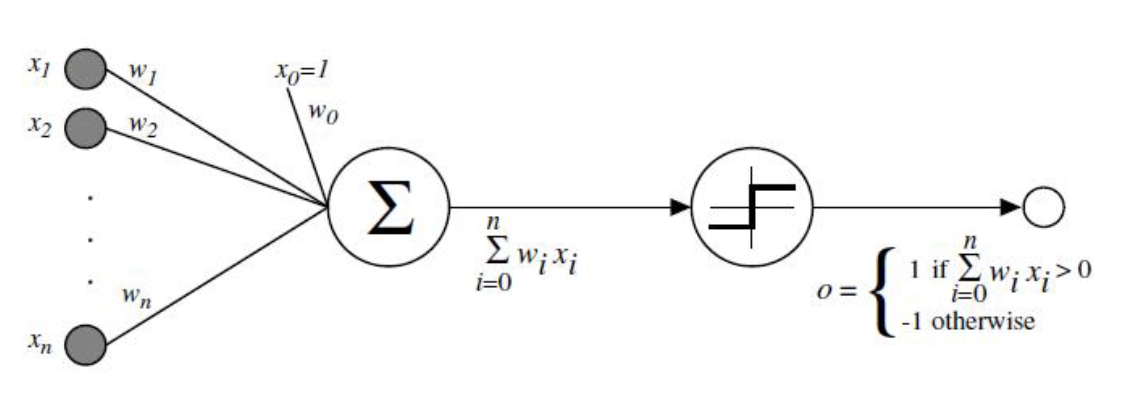

### Limitations

This slide illustrates the limitations of a single-layer perceptron when trying to solve the XOR (exclusive-or) problem, which is a simple non-linear classification task.

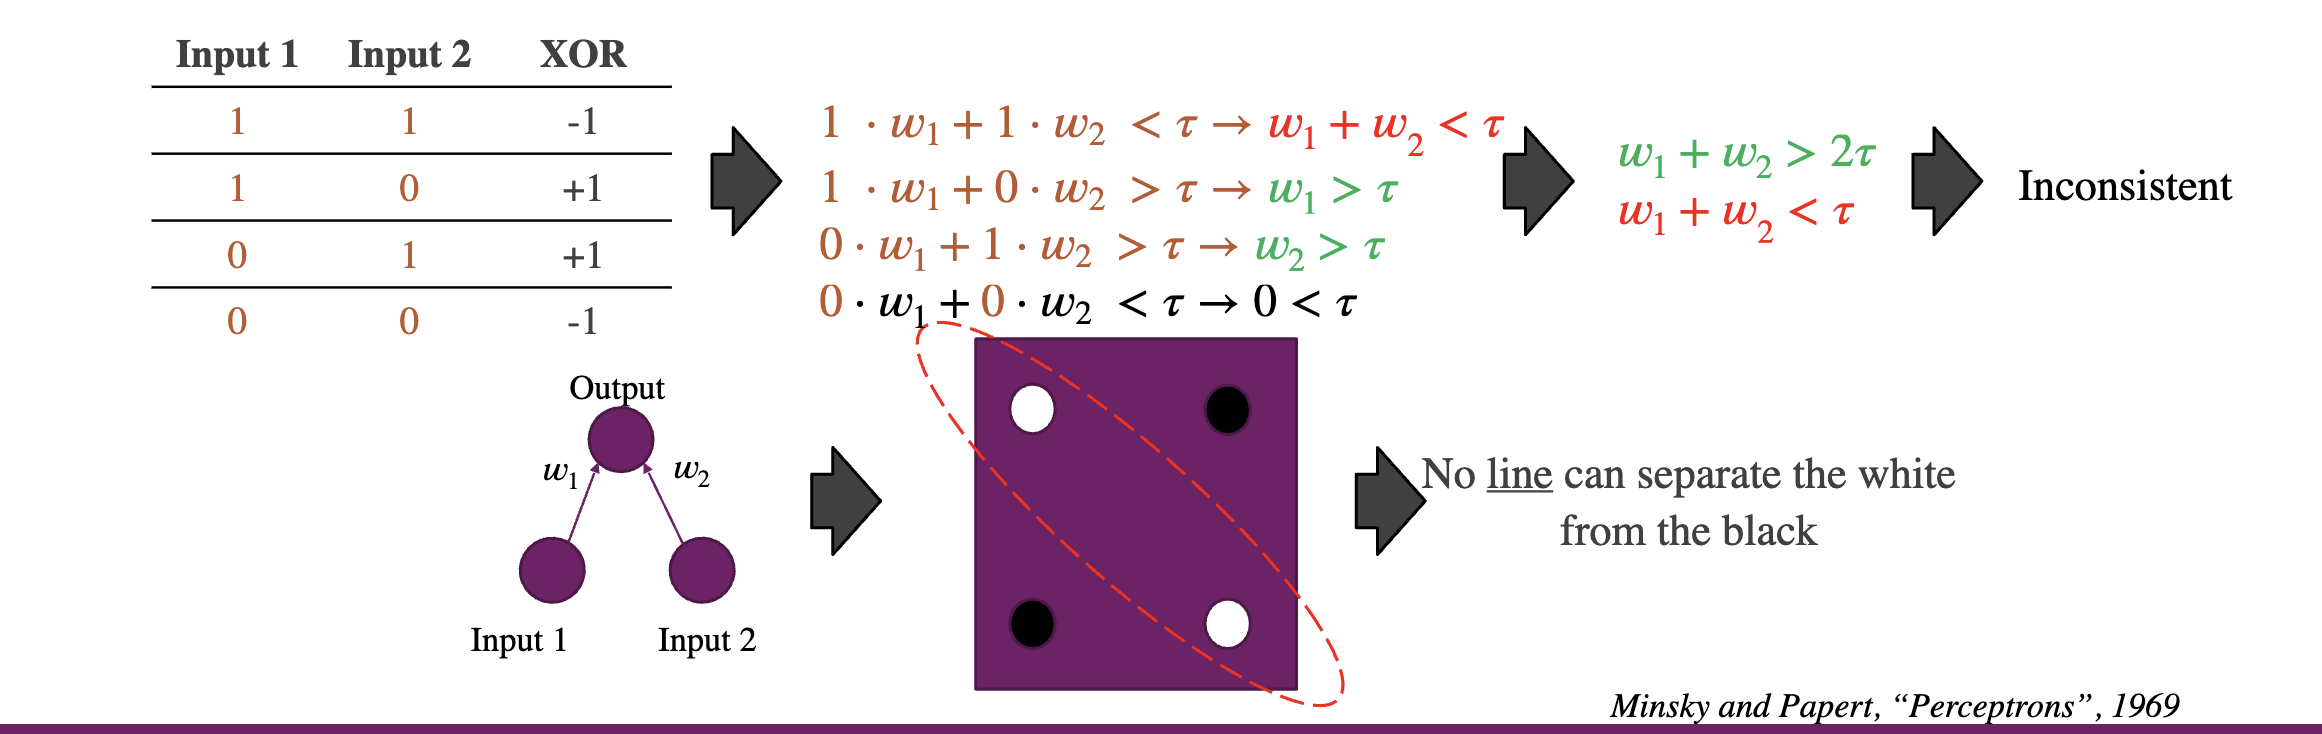

1. **Problem Statement**:
   - The XOR function is defined for two binary inputs and produces an output of 1 if the inputs are different, and -1 if they are the same.
   - The table shows the possible input-output pairs for the XOR function:
     - (1, 1) -> -1
     - (1, 0) -> +1
     - (0, 1) -> +1
     - (0, 0) -> -1

2. **Perceptron Structure**:
   - A single-layer perceptron consists of input nodes connected to an output node, with weights $w_1$ and $w_2$ for each input.
   - The perceptron computes a weighted sum of the inputs and applies a threshold $\tau$ to determine the output.

3. **Mathematical Formulation**:
   - For the perceptron to correctly classify the XOR function, it needs to satisfy the following inequalities:
     - $1 \cdot w_1 + 1 \cdot w_2 < \tau$ for (1, 1) -> -1
     - $1 \cdot w_1 + 0 \cdot w_2 > \tau$ for (1, 0) -> +1
     - $0 \cdot w_1 + 1 \cdot w_2 > \tau$ for (0, 1) -> +1
     - $0 \cdot w_1 + 0 \cdot w_2 < \tau$ for (0, 0) -> -1

4. **Inconsistencies**:
   - Combining the inequalities:
     - From (1, 0) and (0, 1): $w_1 > \tau$ and $w_2 > \tau$
     - From (1, 1): $w_1 + w_2 < \tau$
   - These conditions are contradictory because if both $w_1$ and $w_2$ are greater than $\tau$, then $w_1 + w_2$ must be greater than $2\tau$, which conflicts with $w_1 + w_2 < \tau$.


## Multi-layer perceptrons (MLPs)

_Minsky 1970_

Minsky never said XOR cannot be solved by neural networks.
- Only that XOR cannot be solved  with **1-layer** perceptrons.
- Nevertheless, Rosenblatt's algorithm is not applicable


## Deep feedforward networks
- These are multi-layer-perceptrons (MLPs) -> Name change

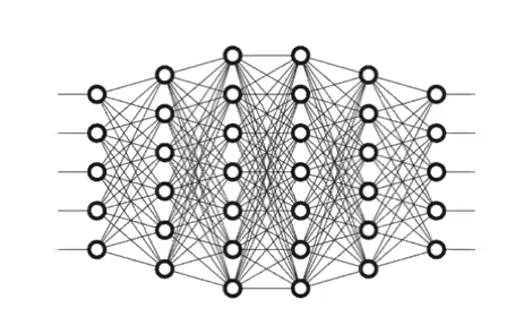

### Key Points:

1. **Definition**:
   - They are called feedforward because information moves in one direction—from input nodes, through hidden nodes (if any), to output nodes.

2. **Goal**:
   - The primary goal of these networks is to approximate a function $f$. Given an input $x$, the network aims to produce an output $y$ that is as close as possible to the desired output.
   - The mapping is defined as $y = f(x; \theta)$, where $\theta$ represents the parameters (weights and biases) of the network that are learned during training.

3. **Learning Parameters**:
   - The network learns the optimal values of the parameters $\theta$ through a training process that involves minimizing the difference between the predicted output and the actual output using techniques like gradient descent.

4. **No Feedback Connections**:
   - Feedforward networks have no feedback connections, meaning that the output of any layer does not influence the same layer or preceding layers.
   - This characteristic differentiates them from recurrent neural networks (RNNs), which include feedback connections and can handle sequential data.

5. **Structure**:
   - The diagram illustrates a typical feedforward network with multiple layers: input layer, several hidden layers, and an output layer.
   - Each layer consists of nodes (neurons) connected to the next layer through weighted edges.

### Additional Note:
- **Brains vs. Neural Networks**:
  - Unlike artificial feedforward networks, biological brains have numerous feedback connections, allowing for more complex and dynamic information processing.

In summary, deep feedforward networks are powerful tools for function approximation and pattern recognition, capable of learning complex relationships from data, but they do not have the capability to handle temporal dependencies due to the lack of feedback connections.

**Temporal dependencies** refer to relationships or patterns in data that are influenced by the order or timing of events. In other words, the current state or output is dependent on previous states or inputs over time. This concept is crucial in tasks like time-series forecasting, speech recognition, and natural language processing, where the sequence of data points affects the outcome.

Deep feedforward networks, also known as multi-layer perceptrons (MLPs), function through the composition of functions. Here's a breakdown of the notation and formulas:

### Formula Breakdown:

1. **General Formulation**:
   - The goal of a deep feedforward network is to approximate a function $f$ that maps input $x$ to output $y$. The function $f$ is parameterized by $\theta$, which represents all the parameters (weights and biases) of the network.
   - This is expressed as:
     $$
     y = f(x; \theta) = a_L(x; \theta_{1, \ldots, L})
     $$
     Here, $a_L$ is the activation of the final layer $L$, and $\theta_{1, \ldots, L}$ represents the parameters of all the layers from 1 to $L$.

2. **Composite Function Representation**:
   - The network can be seen as a series of nested functions, where the output of one layer becomes the input to the next:
     $$
     y = h_L(h_{L-1}(\ldots(h_1(x, \theta_1)), \theta_{L-1}), \theta_L)
     $$
     Here:
     - $h_1$ is the function representing the first layer, parameterized by $\theta_1$.
     - $h_{L-1}$ is the function representing the second-to-last layer, parameterized by $\theta_{L-1}$.
     - $h_L$ is the function representing the last layer, parameterized by $\theta_L$.
     - Each $h_i$ is typically a combination of a linear transformation followed by a non-linear activation function.

3. **Simplified Notation**:
   - To simplify the notation, we can use the composition operator $\circ$ to denote function composition:
     $$
     a_L = f(x; \theta) = h_L \circ h_{L-1} \circ \ldots \circ h_1 \circ x
     $$
     This means that:
     - $a_L$ is the output of the final layer $L$.
     - Each $h_i$ (for $i = 1$ to $L$) is a function that transforms its input using its parameters $\theta_i$.
     - The overall function $f$ is a composition of these layer functions, applied sequentially from the input $x$ to the final output $a_L$.

In summary, the slide illustrates that a deep feedforward network can be understood as a series of nested functions, each layer transforming its input with its parameters, leading to the final output through a series of compositions.

### Example

Example of a feedforward neural network to classify whether a point in 2D space belongs to class A or class B.

#### Problem:
- We have two classes:
  - Class A: Points near (0, 0)
  - Class B: Points near (1, 1)
- We want to classify a point $x = (x_1, x_2)$ as either Class A or Class B.

#### Simple Neural Network Structure:
- **Input Layer**: 2 neurons (one for each input feature $x_1$ and $x_2$)
- **Hidden Layer**: 2 neurons
- **Output Layer**: 1 neuron (binary output: 0 for Class A, 1 for Class B)

#### Activation Functions:
- **Hidden Layer**: ReLU (Rectified Linear Unit)
- **Output Layer**: Sigmoid (to output a probability between 0 and 1)

#### Network Parameters:
- Weights and biases are denoted as follows:
  - $W_1$: Weights from input layer to hidden layer
  - $b_1$: Biases for hidden layer
  - $W_2$: Weights from hidden layer to output layer
  - $b_2$: Bias for output layer

#### Mathematical Representation:
1. **Input Layer to Hidden Layer**:
   - Let $x = [x_1, x_2]$ be the input vector.
   - Compute the pre-activation of the hidden layer:
     $$
     z_1 = W_1 \cdot x + b_1
     $$
     Suppose:
     $$
     W_1 = \begin{bmatrix} 0.5 & -0.5 \\ 0.3 & 0.8 \end{bmatrix}, \quad b_1 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
     $$
     For an input $x = [0.2, 0.4]$:
     $$
     z_1 = \begin{bmatrix} 0.5 & -0.5 \\ 0.3 & 0.8 \end{bmatrix} \cdot \begin{bmatrix} 0.2 \\ 0.4 \end{bmatrix} + \begin{bmatrix} 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 0.5 \cdot 0.2 + (-0.5) \cdot 0.4 \\ 0.3 \cdot 0.2 + 0.8 \cdot 0.4 \end{bmatrix} = \begin{bmatrix} -0.1 \\ 0.38 \end{bmatrix}
     $$

2. **Hidden Layer Activation**:
   - Apply ReLU activation function to $z_1$:
     $$
     a_1 = \text{ReLU}(z_1) = \begin{bmatrix} \max(0, -0.1) \\ \max(0, 0.38) \end{bmatrix} = \begin{bmatrix} 0 \\ 0.38 \end{bmatrix}
     $$

3. **Hidden Layer to Output Layer**:
   - Compute the pre-activation of the output layer:
     $$
     z_2 = W_2 \cdot a_1 + b_2
     $$
     Suppose:
     $$
     W_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \quad b_2 = 0
     $$
     For $a_1 = [0, 0.38]$:
     $$
     z_2 = \begin{bmatrix} 1 & -1 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 0.38 \end{bmatrix} + 0 = 1 \cdot 0 + (-1) \cdot 0.38 = -0.38
     $$

4. **Output Layer Activation**:
   - Apply the Sigmoid activation function to $z_2$:
     $$
     a_2 = \sigma(z_2) = \frac{1}{1 + e^{-z_2}} = \frac{1}{1 + e^{0.38}} \approx 0.406
     $$

#### Interpretation:
- The final output $a_2 \approx 0.406$ represents the probability that the input point belongs to Class B.
- Since $0.406 < 0.5$, we classify the point $(0.2, 0.4)$ as Class A.

#### Summary:
- **Input**: $x = (0.2, 0.4)$
- **Hidden Layer Computation**:
  - $z_1 = [-0.1, 0.38]$
  - $a_1 = [0, 0.38]$
- **Output Layer Computation**:
  - $z_2 = -0.38$
  - $a_2 \approx 0.406$
- **Classification**: Class A

This simple example demonstrates the forward pass of a feedforward neural network, where inputs are transformed layer by layer to produce a final output, used for classification.

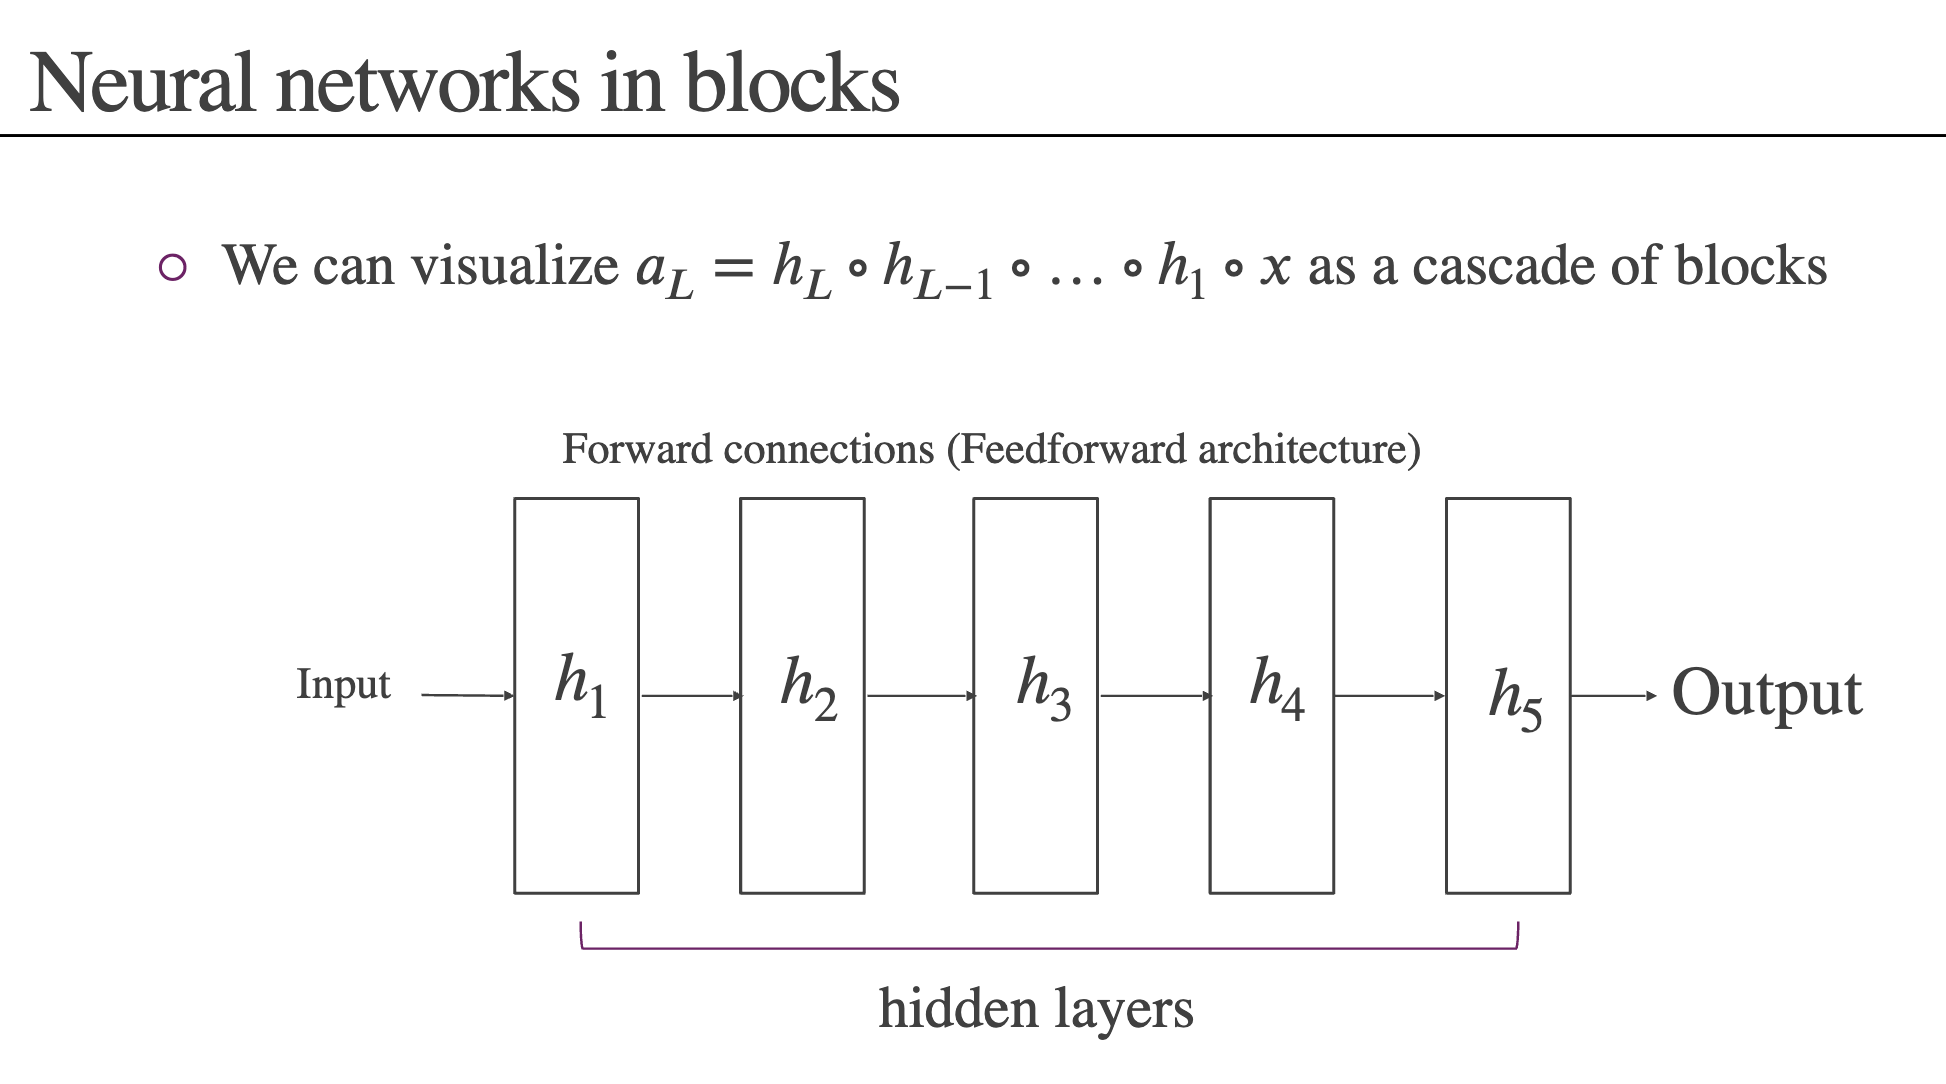

